In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\rocky.kumar\AppData\Local\Temp\ipykernel_33684\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [4]:
#reshape y as standard scaler needs a 2d array.
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [5]:
# Features Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
print(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [8]:
# using rbf kernel for the SVM which is the guassian function based kernel.
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

c:\Users\rocky.kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

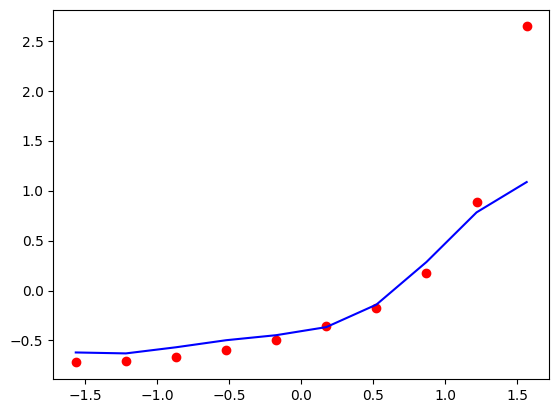

In [15]:
plt.scatter(X,y,color='red')
plt.plot(X, regressor.predict(X).reshape(-1,1),color ='blue')

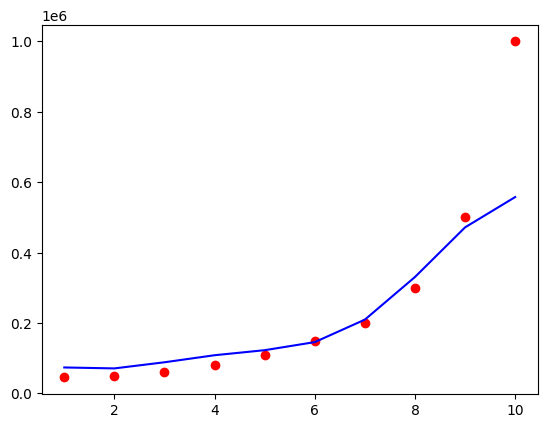

In [16]:
# plot with actual values - 
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')

C:\Users\rocky.kumar\AppData\Local\Temp\ipykernel_33684\2097885638.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)


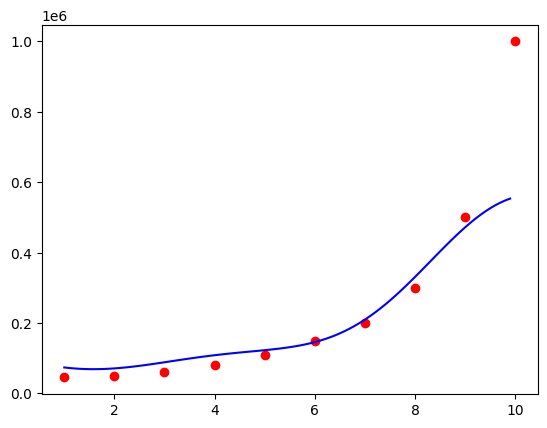

In [19]:
# for a smoother graph
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')